<h2 align=center>Supermarket Sales Analysis</h2>

Author: Mingyu Lin

Date: 5/31/22

***

## I) Introduction

My goal for this project is to practice data analysis using python as a tool. The main libraries used are the classic trio: numpy, pandas, and matplotlib, plus seaborn for additional visualizations. While this project doesn’t cover everything python has to offer, I think it is comprehensive enough to demonstrate the basic through intermediate level of data analysis. The data analysis process used in this project is similar to the process taught by the Google Data Analytics Certificate program, which is as follows: Ask, Prepare, Process, Analyze, Share, and Act.

The data I’ll be analyzing is a supermarket company's sales data. To make the data analysis more interesting and give structure to the project, I’ll pretend that a manager of the company has asked me to analyze the data to guide business decisions that will benefit the company and create key business questions that will serve as the main framework for this project.

Link to data source:: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

**Context:**
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Attribute information:**

1. Invoice id: Computer generated sales slip invoice identification number

2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).

3. City: Location of supercenters

4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. Gender: Gender type of customer

6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. Unit price: Price of each product in $

8. Quantity: Number of products purchased by customer

9. Tax:  tax fee for customer buying

10. Total: Total price including tax

11. Date: Date of purchase (Record available from January 2019 to March 2019)

12. Time: Purchase time (10am to 9pm)

13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. COGS: Cost of goods sold

15. Gross margin percentage: Gross margin percentage

16. Gross income: Gross income

17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


## II) Questions

The goal for the analysis is to analyze sales data to gain insights that will bring benefits to the company. To that end, I’ll ask and create some key business questions.

**Key Questions:**
1. How has the revenue changed over the months?
2. How can the company improve revenue for the upcoming months? 
3. Which branch should the company expand its services to?
4. What are the busiest hours that need to be staffed with more workers? 

## III) Validations

To assess the validities of the dataset, I will use the ROCCC framework.
1. Reliable: Low. It is unclear whether the data are real or fictitious. The data seem to have realistic attributes such as invoice id. However, the source is unknown.
2. Original: Medium. The dataset seems to come directly from a supermarket company. It is not third-party data. 
3. Comprehensive: Medium. The dataset contains useful information such as the product lines, date of purchase, revenue, cost of goods sold, gross income, etc. The data are comprehensive enough to perform data analysis.
4. Current: Low. The dataset is from 2019, which is not current.
5. Cited: Low. The dataset was uploaded by a Kaggle user. It is not officially verified.

Overall, while this dataset may be deemed less valid than standard, it is good enough for the purpose of this project. The data can be manipulated and analyzed; it can produce some interesting visualizations for the main analysis and exploratory data analysis.

## IV) Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_csv('supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
sales.duplicated().value_counts()

False    1000
dtype: int64

There are no missing and duplicated values but there are some things that need to be cleaned:

- `Branch` column and `City` column both show the same thing. Having both of them is redundant. Replace `Branch` column’s values with those of `City` column and drop the `City` column.
- Change the following columns’ object type to category type: `Branch`, `Customer type`, `Gender`, `Product line`, and `Payment`. pandas’s category type reduces memory needed to store values for the columns if there are few identical values, thereby increasing efficiency.
- Title capitalize the `Product line` and `Payment` columns’ values
- Change `Date` column’s type from object to datetime 
- Extract month from `Date` column and set it as a new column and extract hour from `Time` column and set it as a new column
- Set the `Date` column as row index
- Add a `Revenue` column before the `cogs` column
- Rename all columns to lower case and snake case

In [6]:
condition_A = sales['Branch'] == 'A'
sales.loc[condition_A, 'Branch'] = 'Yangon'
condition_B = sales['Branch'] == 'B'
sales.loc[condition_B, 'Branch'] = 'Mandalay'
condition_C = sales['Branch'] == 'C'
sales.loc[condition_C, 'Branch'] = 'Naypyitaw'
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [7]:
sales.drop('City', axis = 1, inplace = True)
sales.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [8]:
sales[['Branch', 'Customer type', 'Gender', 'Product line', 'Payment']] = \
sales[['Branch', 'Customer type', 'Gender', 'Product line', 'Payment']].astype('category')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   object  
 1   Branch                   1000 non-null   category
 2   Customer type            1000 non-null   category
 3   Gender                   1000 non-null   category
 4   Product line             1000 non-null   category
 5   Unit price               1000 non-null   float64 
 6   Quantity                 1000 non-null   int64   
 7   Tax 5%                   1000 non-null   float64 
 8   Total                    1000 non-null   float64 
 9   Date                     1000 non-null   object  
 10  Time                     1000 non-null   object  
 11  Payment                  1000 non-null   category
 12  cogs                     1000 non-null   float64 
 13  gross margin percentage  1000 non-null   float64 
 14  gross inc

In [9]:
sales['Product line'] = sales['Product line'].str.title()
sales['Payment'] = sales['Payment'].str.title()
sales.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit Card,324.31,4.761905,16.2155,7.4


In [10]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   Customer type            1000 non-null   category      
 3   Gender                   1000 non-null   category      
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [11]:
sales.insert(10, 'Month', sales['Date'].dt.month_name())
sales.insert(12, 'Hour', pd.to_datetime(sales['Time']).dt.hour)
sales.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Month,Time,Hour,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,2019-01-05,January,13:08,13,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,2019-03-08,March,10:29,10,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,2019-03-03,March,13:23,13,Credit Card,324.31,4.761905,16.2155,7.4


In [12]:
sales.set_index('Date', inplace = True)
sales.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Time,Hour,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,January,13:08,13,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,March,10:29,10,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,March,13:23,13,Credit Card,324.31,4.761905,16.2155,7.4


In [13]:
sales.insert(12, 'Revenue', sales['Total'])
sales.head(3)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Month,Time,Hour,Revenue,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,January,13:08,13,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,March,10:29,10,80.2200,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,March,13:23,13,340.5255,Credit Card,324.31,4.761905,16.2155,7.4


In [14]:
sales.columns = sales.columns.str.lower()
sales.rename(columns = {'invoice id':'invoice_id', 'customer type':'customer_type', 'product line':'product_line',
                        'unit price':'unit_price', 'tax 5%':'tax_5%', 
                        'gross margin percentage':'gross_margin_percentage', 'gross income':'gross_income'}, \
             inplace = True)
sales.head(3)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,month,time,hour,revenue,payment,cogs,gross_margin_percentage,gross_income,rating
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,Yangon,Member,Female,Health And Beauty,74.69,7,26.1415,548.9715,January,13:08,13,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,Naypyitaw,Normal,Female,Electronic Accessories,15.28,5,3.8200,80.2200,March,10:29,10,80.2200,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,Yangon,Normal,Male,Home And Lifestyle,46.33,7,16.2155,340.5255,March,13:23,13,340.5255,Credit Card,324.31,4.761905,16.2155,7.4


## V) Data Analysis and Visualization

In [15]:
sales.describe()

,unit_price,quantity,tax_5%,total,hour,revenue,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,14.910000,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,3.186857,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.000000,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,12.000000,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,15.000000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,18.000000,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,20.000000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


From the statistical analysis, there are several things to be noted:

1. The supermarket sells high-priced items. For example, the minimum unit price is around 10 dollars, which is very high for a cheap item in a supermarket.
2. On average, shoppers buy five items.
3. On average, the supermarket makes 15 dollars per transaction (gross income).
4. The supermarket has an above average rating of 6.9.

### Main Analysis:

The key business questions are operationalized as the following:
1. What are the sum of revenue for each month?
2. What are the top three product lines?
3. Which branch has the highest sales? 
4. What hours have the most customer purchases? 

In [16]:
rev_sum = sales.pivot_table(values = 'revenue', index = 'month', aggfunc = 'sum')
order = ['January', 'February', 'March']
rev_sum = rev_sum.reindex(order, axis=0)
rev_sum

,revenue
month,
January,116291.868
February,97219.374
March,109455.507


<AxesSubplot:xlabel='month', ylabel='revenue'>

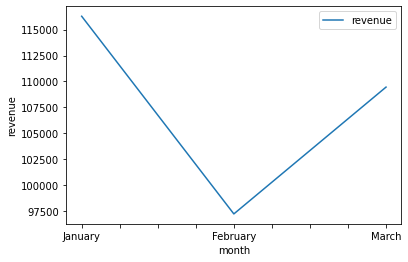

In [17]:
rev_sum.plot(ylabel = 'revenue')

The sales went down in February from January and went up again in March.

In [18]:
top_product = sales['product_line'].value_counts()
top_product

Fashion Accessories       178
Food And Beverages        174
Electronic Accessories    170
Sports And Travel         166
Home And Lifestyle        160
Health And Beauty         152
Name: product_line, dtype: int64

Text(0, 0.5, 'product line')

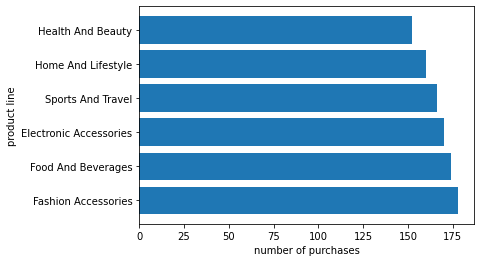

In [19]:
plt.barh(top_product.index, top_product)
plt.xlabel('number of purchases')
plt.ylabel('product line')

The top three product lines are fashion accessories, food and beverages, and electronic accessories.

In [20]:
top_branch = sales.groupby('branch')['revenue'].sum()
top_branch

branch
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: revenue, dtype: float64

Text(0, 0.5, 'branch')

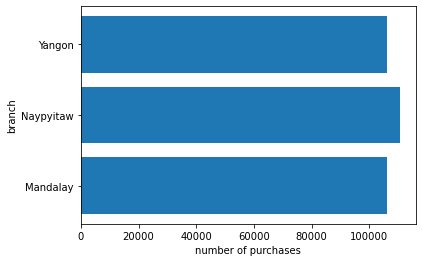

In [21]:
plt.barh(top_branch.index, top_branch)
plt.xlabel('number of purchases')
plt.ylabel('branch')

Naypyitaw's branch is the branch with the highest sales.

In [22]:
top_hour = sales['hour'].value_counts()
top_hour

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='number of purchases'>

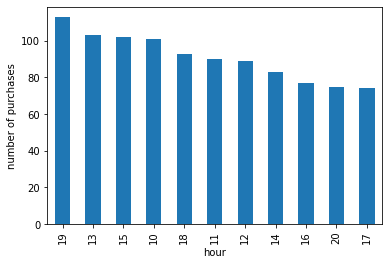

In [23]:
top_hour.plot(xlabel = 'hour', ylabel = 'number of purchases', kind = 'bar')

The top three hours for customer purchase are 7pm, 1pm, and 3pm.

### Exploratory Data Analysis

Univariate Analysis:
1. What does the rating distribution look like?
2. How many customers give excellent, average, and poor ratings?
3. What is the most popular payment method?

Bivariate Analysis:
1. Do members buy more goods than normal customers?
2. What products do men and women buy differently?
3. What are the correlations between variables?


<Figure size 600x400 with 0 Axes>

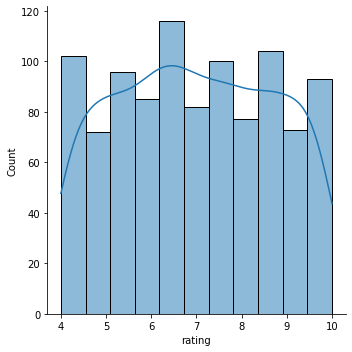

In [24]:
plt.figure(figsize=(6,4),dpi=100)
sns.displot(sales['rating'], kde = True)

The most popular ratings are between 6 and 7.

Text(0, 0.5, 'count')

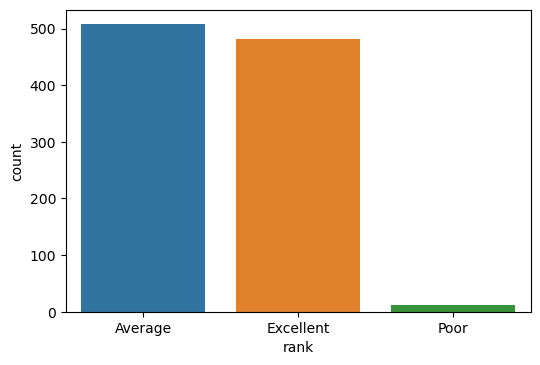

In [25]:
def rank(rating):
    if rating <= 4:
        return 'Poor'
    if rating <= 7:
        return 'Average'
    return 'Excellent'

plt.figure(figsize=(6,4),dpi=100)
ranking = sales['rating'].apply(rank).value_counts()
ranking_plot = sns.barplot(x = ranking.index, y = ranking, data = sales)
plt.xlabel('rank')
plt.ylabel('count')

There are very few poor ratings comapared to average and excellent ratings.

<AxesSubplot:xlabel='count', ylabel='payment'>

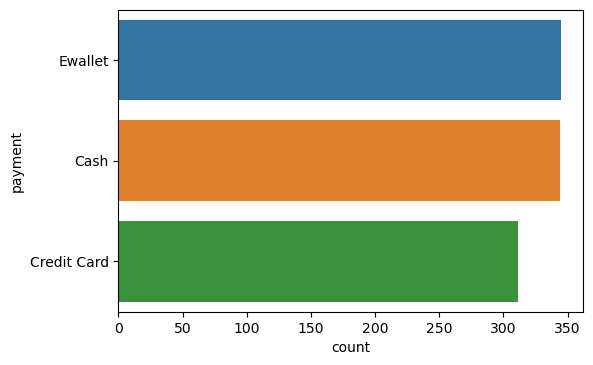

In [26]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(y ='payment', data = sales)

Payment using ewallet or cash is more popular than that of credit card.

<AxesSubplot:xlabel='customer_type', ylabel='quantity'>

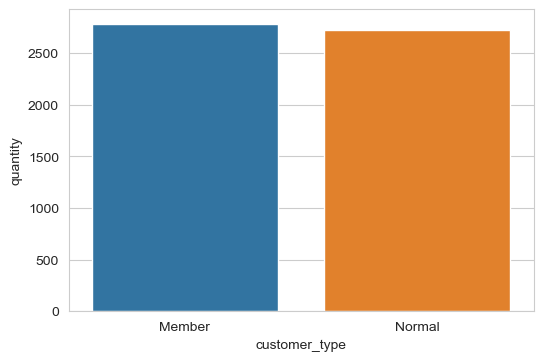

In [27]:
customer_quantity = sales.groupby('customer_type')['quantity'].sum()
plt.figure(figsize=(6,4),dpi=100)
sns.set_style("whitegrid")
sns.barplot(x = customer_quantity.index, y = customer_quantity, data = sales)

Members buy more items than normal customers.

<AxesSubplot:xlabel='count', ylabel='product_line'>

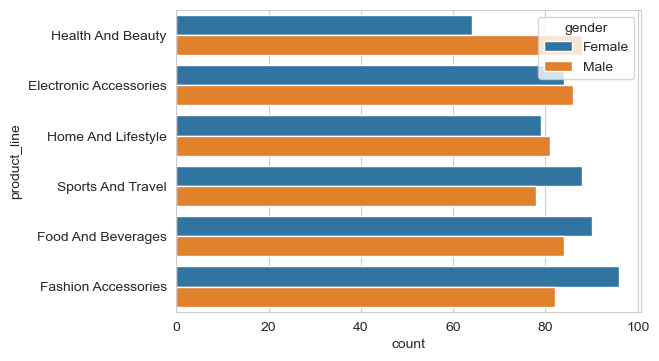

In [28]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(y ='product_line', hue = "gender", data = sales)

It seems like Women buy fashion accessories, food and beverages, and sports and travel items more than men while men buy health and beauty items more than women. The remaining product lines don't seem to be significant between men and women.

<AxesSubplot:>

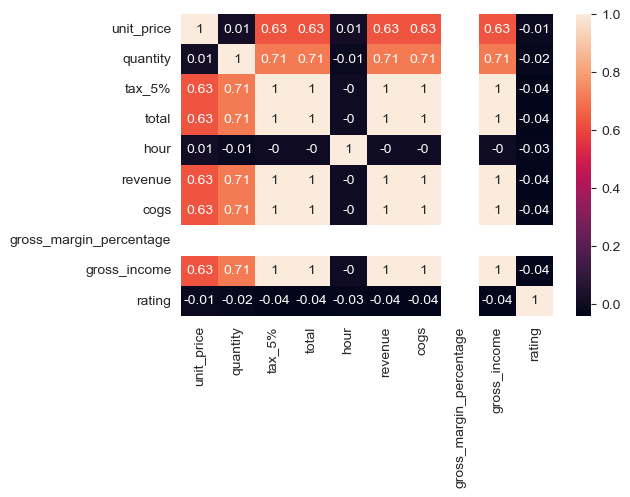

In [29]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(np.round(sales.corr(), 2), annot = True)

Unit price and quanity correlate the most with tax_5%, total, revenue, cogs, and gross_income.

## VI) Conclusions

**1. How has the revenue changed over the months?**

After January, the revenue decreased in February and increased again in March.

**2. How can the company improve revenue for the upcoming months?** 

The most purchase product lines are fashion accessories, food and beverages, and electronic accessories. The company can have a sales event on these product lines to increase revenue for the upcoming months. 

**3. Which branch should the company expand its services to?**

The branch the company should expand its services to is the branch with the highest sales. More sales means more revenue. The company should expand its service to Naypyitaw because that is the branch with the highest sales. 

**4. What are the busiest hours that need to be staffed with more workers?**

The busiest hours with high costumer purchases are 7pm, 1pm, and 3pm. The company should have more cashiers on duty at those hours so the supermarkets would not be crowded.